In [1]:
from modules.data import data_reader, data_loader, time_series_analysis
import pandas as pd
import numpy as np
import os

In [2]:
#evaluation = data_reader.read_data(match=["stock"], location="evaluation")
#prediction = data_reader.read_data(match=["stock"], location="prediction")

In [3]:
def save_dataframe_to_csv(dataframe: pd.DataFrame, file_path: str):
    """
    Saves a pandas DataFrame to a CSV file at the specified location.

    Parameters:
    dataframe (pd.DataFrame): The DataFrame to save.
    file_path (str): The location where the CSV file will be saved.

    Returns:
    None
    """
    try:
        dataframe.to_csv(file_path, index=True)
        print(f"DataFrame saved successfully to {file_path}")
    except Exception as e:
        print(f"An error occurred while saving the DataFrame: {e}")

# Data aggregation

In [4]:
# path to evaluation directory
project_folder = os.getcwd()
directory = os.path.abspath(os.path.join(project_folder, "results", "evaluation_with_mes"))
aggregated_results_directory = os.path.abspath(os.path.join(project_folder, "results", "aggregated_results"))

m = ["r2", "mse", "mae", "rmse", "mda", "mape", "mes"]

In [5]:
# Initialize an empty DataFrame to store the aggregated results
aggregated_evaluation = pd.DataFrame()
aggregated_ranking = pd.DataFrame()

In [6]:
# List all files in the directory
files = [f for f in os.listdir(directory) if f.endswith('.csv')]

In [7]:
# Process each file and add to aggregated evaluation

higher_better = ['r2', 'mda', "mes"]
lower_better = ['mse', 'mae', 'rmse', 'mape']

for file in files:
    # Extract parameters from the file name
    base_name = os.path.splitext(file)[0]
    parameters = base_name.split('_')
    param_dict = {}
    for param in parameters:
        if "=" not in param:
            param_dict["FTS"] = param
        else:
            key, value = param.split('=')
            param_dict[key] = value

    # Read the CSV file into a DataFrame
    file_path = os.path.join(directory, file)
    df = pd.read_csv(file_path)
    df.rename(columns={"Unnamed: 0" : "model"}, inplace=True)

    
    

    # Add parameter columns to the DataFrame
    for key, value in param_dict.items():
        df[key] = value

    # creating the ranking df
    ranked_df = df.copy()
    ranked_df['model'] = df['model']

    # Rank the models for each metric and add to the new DataFrame
    for metric in higher_better:
        ranked_df[metric] = df[metric].rank(ascending=False, method='min').astype(int)

    for metric in lower_better:
        ranked_df[metric] = df[metric].rank(ascending=True, method='min').astype(int)

    # Append the DataFrame to the aggregated DataFrame
    aggregated_evaluation = pd.concat([aggregated_evaluation, df], ignore_index=True)
    aggregated_ranking = pd.concat([aggregated_ranking, ranked_df], ignore_index=True)


In [8]:
def determine_trend(row):
    if row['linear_trend']:
        return 'linear'
    else:
        return 'no_trend'

data_params = ['SD', 'ED', 'FR', 'T', 'TOD']
unique_data_combinations = aggregated_ranking.drop_duplicates(subset=data_params)[data_params]

new_df = pd.DataFrame(columns = data_params)

for i, data_combination in unique_data_combinations.iterrows():



    type = data_combination["TOD"]
    ticker = data_combination["T"]
    frequency = data_combination["FR"]
    start = data_combination["SD"]
    end = data_combination["ED"]

    if ticker == "USDGBP":
        ticker = "USD/GBP"

    
    data =  data_loader.get_data(type = type, ticker = ticker,
                                    frequency = frequency, start = start,
                                    end = end, rtrn = True)
    

    data_features = time_series_analysis.analyze_time_series(data)
    row = {}
    for k in data_params:
        row[k] = data_combination[k]
    for k in data_features.keys():
        row[k] = data_features[k]

    #return new_df
    new_df = pd.concat([new_df, pd.DataFrame([row])], ignore_index=True)

new_df['trend'] = new_df.apply(determine_trend, axis=1)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

c:\Users\topco\Dokumenti\MSc Banking and Digital Finance UCL\Modules\Dissertation\MSc_dissertation\modules\data\data_loader.py:129: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['y'] = df['y'].fillna(method='bfill') # imputing the missing values
c:\Users\topco\Dokumenti\MSc Banking and Digital Finance UCL\Modules\Dissertation\MSc_dissertation\modules\data\data_loader.py:129: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['y'] = df['y'].fillna(method='bfill') # imputing the missing values
c:\Users\topco\Dokumenti\MSc Banking and Digital Finance UCL\Modules\Dissertation\MSc_dissertation\modules\data\data_loader.py:129: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['y'] = df['y'].fillna(method='bfill') # imputing the m

In [9]:
new_df

,SD,ED,FR,T,TOD,stationary,adf_statistic,linear_trend,linear_tau,cyclical_patterns,n_partial_autocorrelations,residual_mean,residual_volatility,trend
0,2020-01-01,2022-01-01,daily,Aggregate,cc,True,-3.406147,True,0.343862,True,13.0,0.0,0.0,linear
1,2022-01-01,2024-01-01,daily,Aggregate,cc,True,-4.468611,True,0.247237,True,7.0,0.0,0.0,linear
2,2020-01-01,2024-01-01,weekly,Aggregate,cc,False,-2.302205,True,0.503660,True,6.0,0.0,0.0,linear
3,2020-01-01,2022-01-01,daily,Delayable,cc,True,-3.973469,True,0.114581,True,13.0,0.0,0.0,linear
4,2022-01-01,2024-01-01,daily,Delayable,cc,True,-3.366926,True,0.154029,True,9.0,0.0,0.0,linear
5,2020-01-01,2024-01-01,weekly,Delayable,cc,True,-4.464921,True,-0.106668,True,4.0,0.0,0.0,linear
6,2018-01-01,2020-01-01,daily,DOWJ,index,True,-22.858303,False,0.001392,False,1.0,0.0,0.0,no_trend
7,2020-01-01,2022-01-01,daily,DOWJ,index,True,-6.669457,False,-0.009499,False,1.0,0.0,0.0,no_trend
8,2022-01-01,2024-01-01,daily,DOWJ,index,True,-21.733232,False,0.049972,True,9.0,0.0,0.0,no_trend
9,1987-01-01,2024-01-01,monthly,DOWJ,index,True,-15.217824,False,-0.009633,False,1.0,0.0,0.0,no_trend


In [10]:
# plotting

"""import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Checking the distribution of the boolean variables
def plot_boolean_distribution(df, bool_columns):
    # Create subplots in a single row, with shared y-axis
    fig, axes = plt.subplots(nrows=1, ncols=len(bool_columns), figsize=(len(bool_columns) * 6, 4), sharey=True)

    # If there's only one boolean column, ensure axes is treated as a list
    if len(bool_columns) == 1:
        axes = [axes]

    for ax, col in zip(axes, bool_columns):
        # Calculate the proportion for each category (True and False)
        prop_data = df[col].value_counts(normalize=True).sort_index()

        # Plot the proportions
        sns.barplot(x=prop_data.index.astype(str), y=prop_data.values, ax=ax)
        ax.set_title(f'Distribution of {col}')
        
        # Set y-axis limit to ensure all plots share the same scale
        ax.set_ylim(0, 1.05)  # Proportions always range from 0 to 1
        
        # Add labels to the bars (displaying proportions)
        for p, proportion in zip(ax.patches, prop_data.values):
            height = p.get_height()
            ax.annotate(f'{proportion:.2f}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.tight_layout()
    plt.show()

boolean_cols = ['quadratic_trend', 'cyclical_patterns', 'stationary']
plot_boolean_distribution(new_df, boolean_cols)"""


"import matplotlib.pyplot as plt\nimport seaborn as sns\nimport pandas as pd\n\n# 1. Checking the distribution of the boolean variables\ndef plot_boolean_distribution(df, bool_columns):\n    # Create subplots in a single row, with shared y-axis\n    fig, axes = plt.subplots(nrows=1, ncols=len(bool_columns), figsize=(len(bool_columns) * 6, 4), sharey=True)\n\n    # If there's only one boolean column, ensure axes is treated as a list\n    if len(bool_columns) == 1:\n        axes = [axes]\n\n    for ax, col in zip(axes, bool_columns):\n        # Calculate the proportion for each category (True and False)\n        prop_data = df[col].value_counts(normalize=True).sort_index()\n\n        # Plot the proportions\n        sns.barplot(x=prop_data.index.astype(str), y=prop_data.values, ax=ax)\n        ax.set_title(f'Distribution of {col}')\n        \n        # Set y-axis limit to ensure all plots share the same scale\n        ax.set_ylim(0, 1.05)  # Proportions always range from 0 to 1\n        \

In [11]:
# plotting

"""import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Mapping for renaming the bars
rename_map = {
    'cc': 'CHAPS',
    'index': 'Stock index',
    'fx': 'Exchange rate',
    'commodity': 'Commodity'
}

# Modified function to use subplots and meet new requirements
def plot_categorical_distribution(df, cat_columns):
    fig, axes = plt.subplots(1, len(cat_columns), figsize=(12, 4))

    # Loop through categorical columns and respective subplot axes
    for i, col in enumerate(cat_columns):
        # Map the categorical values to renamed bars
        mapped_values = df[col].map(rename_map).fillna(df[col])  # Map values & fill missing ones with original

        # Calculate proportions
        prop_df = mapped_values.value_counts(normalize=True).reset_index()
        prop_df.columns = ['Category', 'Proportion']  # Rename columns for clarity
        sns.barplot(x='Category', y='Proportion', data=prop_df, ax=axes[i])

        # Set titles
        if i == 0:
            axes[i].set_title('Types of data')
        elif i == 1:
            axes[i].set_title('Data frequencies')

        # Remove x-axis label
        axes[i].set_xlabel('')

        # Set y-axis label to 'Proportion'
        axes[i].set_ylabel('Proportion')

        # Adjust y-axis limits to provide more space above bars
        axes[i].set_ylim(0, 1.1 * prop_df['Proportion'].max())

        # Add value labels on top of each bar
        for p in axes[i].patches:
            height = p.get_height()
            axes[i].text(
                p.get_x() + p.get_width() / 2,  # Position at the center of the bar
                height + 0.02,  # Slightly more space above the bar
                f'{height:.2f}',  # Format the proportion value to two decimal places
                ha="center"  # Horizontal alignment
            )

    plt.tight_layout()
    plt.show()

# Example usage
categorical_cols = ['TOD', 'FR']
plot_categorical_distribution(new_df, categorical_cols)"""


'import matplotlib.pyplot as plt\nimport seaborn as sns\nimport pandas as pd\n\n# Mapping for renaming the bars\nrename_map = {\n    \'cc\': \'CHAPS\',\n    \'index\': \'Stock index\',\n    \'fx\': \'Exchange rate\',\n    \'commodity\': \'Commodity\'\n}\n\n# Modified function to use subplots and meet new requirements\ndef plot_categorical_distribution(df, cat_columns):\n    fig, axes = plt.subplots(1, len(cat_columns), figsize=(12, 4))\n\n    # Loop through categorical columns and respective subplot axes\n    for i, col in enumerate(cat_columns):\n        # Map the categorical values to renamed bars\n        mapped_values = df[col].map(rename_map).fillna(df[col])  # Map values & fill missing ones with original\n\n        # Calculate proportions\n        prop_df = mapped_values.value_counts(normalize=True).reset_index()\n        prop_df.columns = [\'Category\', \'Proportion\']  # Rename columns for clarity\n        sns.barplot(x=\'Category\', y=\'Proportion\', data=prop_df, ax=axes[i])\

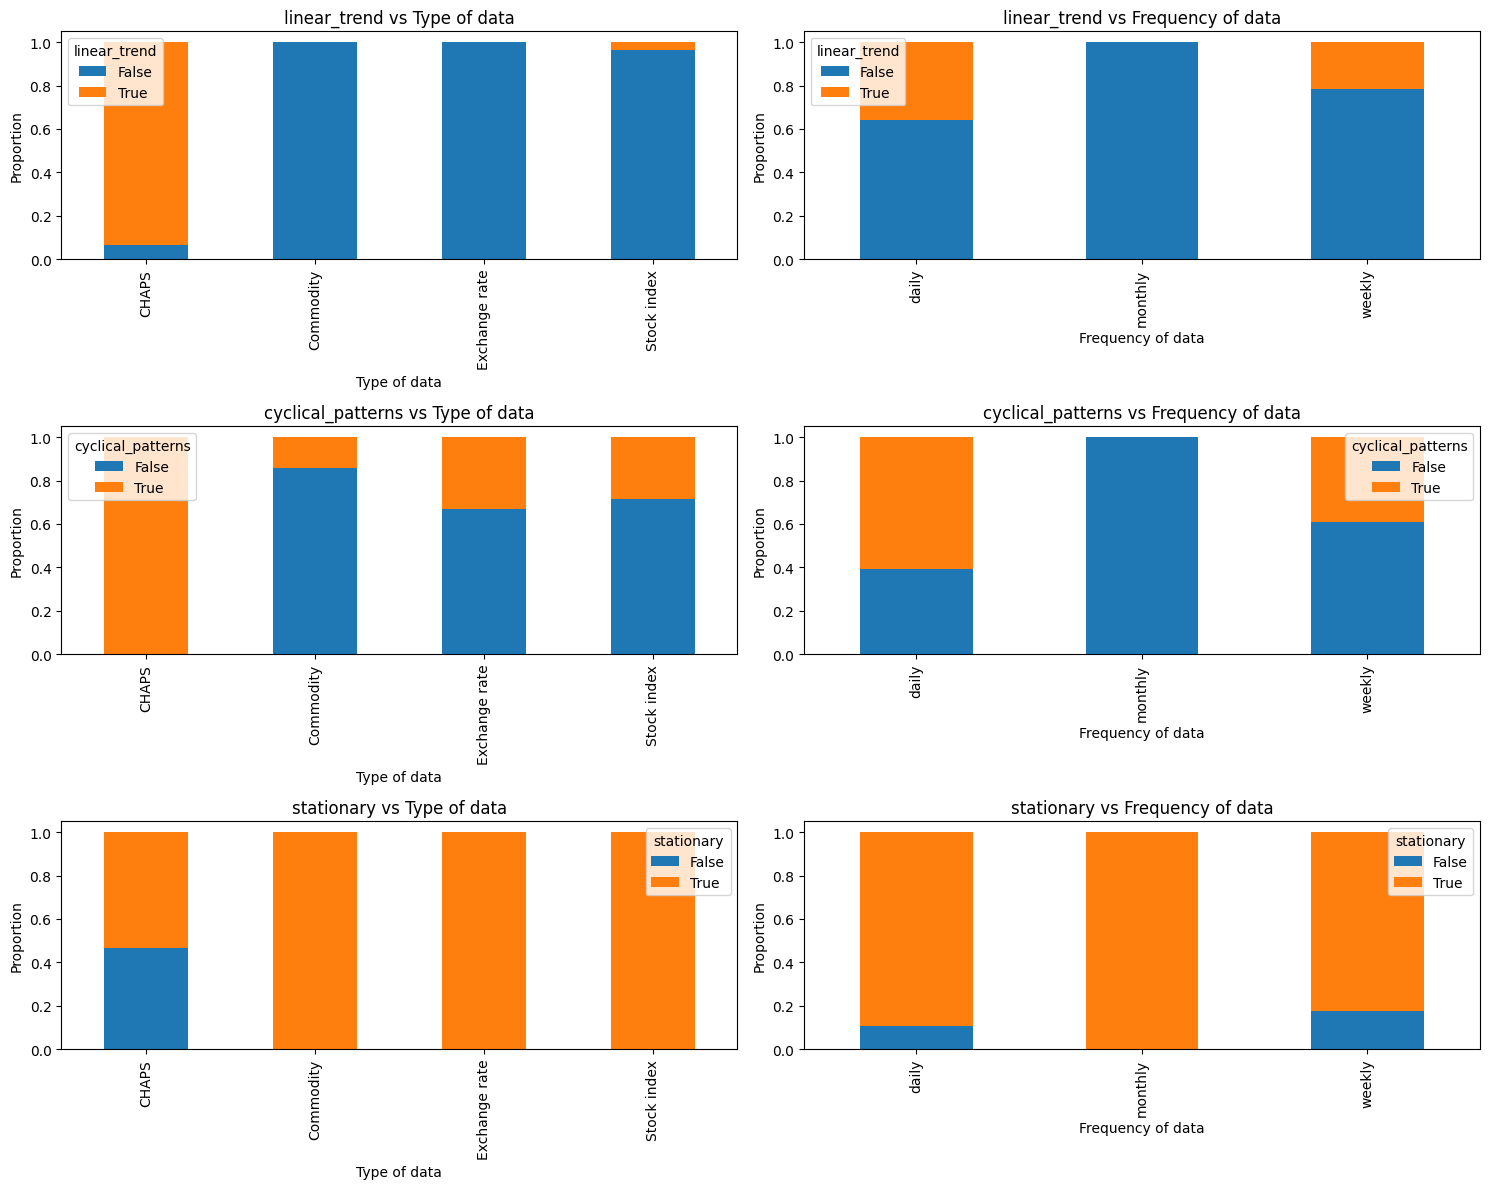

In [12]:
# plotting

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Function to calculate proportions for each categorical variable
def plot_proportions(data, categorical_col, boolean_col, ax):
    # Cross-tabulate to get counts
    crosstab = pd.crosstab(data[categorical_col], data[boolean_col], normalize='index')
    
    # Plot the normalized counts (proportions)
    crosstab.plot(kind='bar', stacked=True, ax=ax)
    
    # Replace "TOD" and "FR" with custom labels for title and x-axis
    if categorical_col == 'TOD':
        categorical_label = 'Type of data'
    elif categorical_col == 'FR':
        categorical_label = 'Frequency of data'
    else:
        categorical_label = categorical_col
    
    ax.set_title(f'{boolean_col} vs {categorical_label}')
    ax.set_xlabel(categorical_label)
    ax.set_ylabel('Proportion')
    ax.legend(title=boolean_col)
    
    # Get current x-axis labels and replace specific names
    x_labels = [label.get_text() for label in ax.get_xticklabels()]
    new_labels = []
    for label in x_labels:
        if label == 'cc':
            new_labels.append('CHAPS')
        elif label == 'index':
            new_labels.append('Stock index')
        elif label == 'fx':
            new_labels.append('Exchange rate')
        elif label == 'commodity':
            new_labels.append('Commodity')
        else:
            new_labels.append(label)
    
    # Set the new x-axis labels
    ax.set_xticklabels(new_labels)

# Set up the matplotlib figure
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# Plot for 'quadratic_trend' and 'TOD'
plot_proportions(new_df, 'TOD', 'linear_trend', axes[0, 0])

# Plot for 'quadratic_trend' and 'FR'
plot_proportions(new_df, 'FR', 'linear_trend', axes[0, 1])

# Plot for 'cyclical_patterns' and 'TOD'
plot_proportions(new_df, 'TOD', 'cyclical_patterns', axes[1, 0])

# Plot for 'cyclical_patterns' and 'FR'
plot_proportions(new_df, 'FR', 'cyclical_patterns', axes[1, 1])

# Plot for 'stationary' and 'TOD'
plot_proportions(new_df, 'TOD', 'stationary', axes[2, 0])

# Plot for 'stationary' and 'FR'
plot_proportions(new_df, 'FR', 'stationary', axes[2, 1])

# Adjust layout
plt.tight_layout()
plt.show()


In [13]:
#plotting

"""import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume you already have the dataframe `new_df`
# new_df = your_dataframe

# 5. Correlation matrix for boolean variables
def plot_boolean_correlation(df, bool_columns):
    corr_matrix = df[bool_columns].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation matrix of boolean variables')
    plt.show()

plot_boolean_correlation(new_df, boolean_cols)"""

"import pandas as pd\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\n# Assume you already have the dataframe `new_df`\n# new_df = your_dataframe\n\n# 5. Correlation matrix for boolean variables\ndef plot_boolean_correlation(df, bool_columns):\n    corr_matrix = df[bool_columns].corr()\n    plt.figure(figsize=(8, 6))\n    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)\n    plt.title('Correlation matrix of boolean variables')\n    plt.show()\n\nplot_boolean_correlation(new_df, boolean_cols)"

In [14]:
len(unique_data_combinations)

56

In [15]:
def determine_trend(row):
    if row['linear_trend']:
        return 'linear'
    else:
        return 'no_trend'

def add_data_features(df):
    old_names = list(df.columns)
    data_features = ["stationary", "adf_statistic", "linear_trend",
                                                     "linear_tau",
                                                       "cyclical_patterns", "n_partial_autocorrelations", 'residual_volatility', "residual_mean"]

    data_params = ['SD', 'ED', 'FR', 'T', 'TOD']
    new_df = pd.DataFrame(columns = data_params + data_features)

    

    unique_data_combinations = df.drop_duplicates(subset=data_params)[data_params]


    for i, data_combination in unique_data_combinations.iterrows():



        type = data_combination["TOD"]
        ticker = data_combination["T"]
        frequency = data_combination["FR"]
        start = data_combination["SD"]
        end = data_combination["ED"]

        if ticker == "USDGBP":
            ticker = "USD/GBP"

        
        data =  data_loader.get_data(type = type, ticker = ticker,
                                      frequency = frequency, start = start,
                                        end = end, rtrn = True)
        

        data_features = time_series_analysis.analyze_time_series(data)
        row = {}
        for k in data_params:
            row[k] = data_combination[k]
        for k in data_features.keys():
            row[k] = data_features[k]

        #return new_df
        new_df = pd.concat([new_df, pd.DataFrame([row])], ignore_index=True)
        #return new_df

    output = df.merge(new_df, on = data_params, how = "left")
            
    output['trend'] = output.apply(determine_trend, axis=1)
    output = output.drop(columns=['linear_trend'])
    
    return output




In [16]:
aggregated_ranking_with_data_features = add_data_features(aggregated_ranking)

C:\Users\topco\AppData\Local\Temp\ipykernel_25436\877072396.py:48: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  new_df = pd.concat([new_df, pd.DataFrame([row])], ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

c:\Users\topco\Dokumenti\MSc Banking and Digital Finance UCL\Modules\Dissertation\MSc_dissertation\modules\data\data_loader.py:129: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['y'] = df['y'].fillna(method='bfill') # imputing the missing values
c:\Users\topco\Dokumenti\MSc Banking and Digital Finance UCL\Modules\Dissertation\MSc_dissertation\modules\data\data_loader.py:129: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['y'] = df['y'].fillna(method='bfill') # imputing the missing values
c:\Users\topco\Dokumenti\MSc Banking and Digital Finance UCL\Modules\Dissertation\MSc_dissertation\modules\data\data_loader.py:129: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['y'] = df['y'].fillna(method='bfill') # imputing the m

In [17]:
pd.set_option('display.max_columns', 10)
aggregated_ranking_with_data_features

,model,r2,mse,mae,rmse,...,cyclical_patterns,n_partial_autocorrelations,residual_volatility,residual_mean,trend
0,arima,2,2,1,2,...,True,13,0.0,0.0,linear
1,autoregressor,1,1,2,1,...,True,13,0.0,0.0,linear
2,ft_lag_llama,5,5,5,5,...,True,13,0.0,0.0,linear
3,ft_timeGPT,4,4,4,4,...,True,13,0.0,0.0,linear
4,lag_llama,6,6,7,6,...,True,13,0.0,0.0,linear
...,...,...,...,...,...,...,...,...,...,...,...
1437,ft_lag_llama,1,1,1,1,...,False,1,0.0,0.0,no_trend
1438,ft_timeGPT,4,4,4,4,...,False,1,0.0,0.0,no_trend
1439,lag_llama,7,7,7,7,...,False,1,0.0,0.0,no_trend
1440,prophet,3,3,2,3,...,False,1,0.0,0.0,no_trend


In [18]:
exploration_index = np.logical_not((aggregated_ranking_with_data_features["TOD"] == "commodity") & (aggregated_ranking_with_data_features["FR"] == "weekly") & ((aggregated_ranking_with_data_features["FTL"] != "200") | (aggregated_ranking_with_data_features["LR"] != "0.0005") | (aggregated_ranking_with_data_features["BS"] != "5") | (aggregated_ranking_with_data_features["ME"] != "4")))



In [19]:
# Create the new dataframe excluding the rows based on the specified conditions
exploration_phase_ranking = aggregated_ranking_with_data_features[exploration_index]


In [20]:
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 50)
exploration_phase_ranking[np.logical_and(np.logical_and(exploration_phase_ranking["TOD"] == "commodity", exploration_phase_ranking["FR"] == "weekly"), exploration_phase_ranking["model"] == "arima")]

,model,r2,mse,mae,rmse,mda,mape,mes,T,FR,TOD,FO,CLTS,SD,ED,FTL,FTF,FTG,TSCVR,BS,ME,LR,FTS,stationary,adf_statistic,linear_tau,cyclical_patterns,n_partial_autocorrelations,residual_volatility,residual_mean,trend
1113,arima,5,5,3,5,4,2,7,WTI,weekly,commodity,5,128,2015-01-01,2020-01-01,200,5,0,6,5,4,0.0005,100,True,-10.782534,0.033502,False,1,0.0,0.0,no_trend
1120,arima,3,3,3,3,7,2,1,WTI,weekly,commodity,5,128,2017-01-01,2022-01-01,200,5,0,6,5,4,0.0005,100,True,-17.004466,0.059756,False,1,0.0,0.0,no_trend
1127,arima,7,7,7,7,5,2,4,WTI,weekly,commodity,5,128,2019-01-01,2024-01-01,200,5,0,6,5,4,0.0005,100,True,-17.053779,-0.040154,False,1,0.0,0.0,no_trend
1134,arima,3,3,2,3,6,3,1,WTI,weekly,commodity,5,32,2015-01-01,2020-01-01,200,5,0,6,5,4,0.0005,100,True,-10.782534,0.033502,False,1,0.0,0.0,no_trend
1141,arima,4,4,4,4,5,2,1,WTI,weekly,commodity,5,32,2017-01-01,2022-01-01,200,5,0,6,5,4,0.0005,100,True,-17.004466,0.059756,False,1,0.0,0.0,no_trend
1316,arima,4,4,2,4,6,2,1,WTI,weekly,commodity,5,32,2019-01-01,2024-01-01,200,5,0,6,5,4,0.0005,100,True,-17.053779,-0.040154,False,1,0.0,0.0,no_trend
1421,arima,2,2,2,2,2,3,5,WTI,weekly,commodity,5,64,2015-01-01,2020-01-01,200,5,0,6,5,4,0.0005,100,True,-10.782534,0.033502,False,1,0.0,0.0,no_trend
1428,arima,3,3,3,3,7,2,1,WTI,weekly,commodity,5,64,2017-01-01,2022-01-01,200,5,0,6,5,4,0.0005,100,True,-17.004466,0.059756,False,1,0.0,0.0,no_trend
1435,arima,6,6,5,6,6,5,1,WTI,weekly,commodity,5,64,2019-01-01,2024-01-01,200,5,0,6,5,4,0.0005,100,True,-17.053779,-0.040154,False,1,0.0,0.0,no_trend


In [21]:
exploration_phase_ranking

,model,r2,mse,mae,rmse,mda,mape,mes,T,FR,TOD,FO,CLTS,SD,ED,FTL,FTF,FTG,TSCVR,BS,ME,LR,FTS,stationary,adf_statistic,linear_tau,cyclical_patterns,n_partial_autocorrelations,residual_volatility,residual_mean,trend
0,arima,2,2,1,2,2,2,1,Aggregate,daily,cc,5,128,2020-01-01,2022-01-01,200,5,0,6,5,4,0.0005,100,True,-3.406147,0.343862,True,13,0.0,0.0,linear
1,autoregressor,1,1,2,1,2,1,1,Aggregate,daily,cc,5,128,2020-01-01,2022-01-01,200,5,0,6,5,4,0.0005,100,True,-3.406147,0.343862,True,13,0.0,0.0,linear
2,ft_lag_llama,5,5,5,5,6,5,1,Aggregate,daily,cc,5,128,2020-01-01,2022-01-01,200,5,0,6,5,4,0.0005,100,True,-3.406147,0.343862,True,13,0.0,0.0,linear
3,ft_timeGPT,4,4,4,4,4,4,1,Aggregate,daily,cc,5,128,2020-01-01,2022-01-01,200,5,0,6,5,4,0.0005,100,True,-3.406147,0.343862,True,13,0.0,0.0,linear
4,lag_llama,6,6,7,6,5,6,1,Aggregate,daily,cc,5,128,2020-01-01,2022-01-01,200,5,0,6,5,4,0.0005,100,True,-3.406147,0.343862,True,13,0.0,0.0,linear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1437,ft_lag_llama,1,1,1,1,2,1,4,WTI,weekly,commodity,5,64,2019-01-01,2024-01-01,200,5,0,6,5,4,0.0005,100,True,-17.053779,-0.040154,False,1,0.0,0.0,no_trend
1438,ft_timeGPT,4,4,4,4,7,4,2,WTI,weekly,commodity,5,64,2019-01-01,2024-01-01,200,5,0,6,5,4,0.0005,100,True,-17.053779,-0.040154,False,1,0.0,0.0,no_trend
1439,lag_llama,7,7,7,7,3,6,4,WTI,weekly,commodity,5,64,2019-01-01,2024-01-01,200,5,0,6,5,4,0.0005,100,True,-17.053779,-0.040154,False,1,0.0,0.0,no_trend
1440,prophet,3,3,2,3,1,2,4,WTI,weekly,commodity,5,64,2019-01-01,2024-01-01,200,5,0,6,5,4,0.0005,100,True,-17.053779,-0.040154,False,1,0.0,0.0,no_trend


In [22]:
"""temp = exploration_phase_ranking[exploration_phase_ranking["TOD"] == "commodity"]
metrics = ["r2", "mse", "mae", "rmse", "mda", "mape", "model"]
group = ["model"]
a = temp[metrics].groupby(group).mean()"""

'temp = exploration_phase_ranking[exploration_phase_ranking["TOD"] == "commodity"]\nmetrics = ["r2", "mse", "mae", "rmse", "mda", "mape", "model"]\ngroup = ["model"]\na = temp[metrics].groupby(group).mean()'

In [23]:
# plotting difference between best model and others


"""df = a
import pandas as pd
import matplotlib.pyplot as plt

# Set the model as the index
df.reset_index(inplace=True)  # This will convert the index into a column
df.set_index('model', inplace=True)

# Initialize a subplot for each column
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# List of metrics/columns to iterate through
metrics = ['r2', 'mse', 'mae', 'rmse', 'mda', 'mape']
axes = axes.flatten()

# Plotting the difference for each metric
for i, metric in enumerate(metrics):
    # Get the minimum value (best model) for the current metric
    min_value = df[metric].min()
    
    # Calculate the difference between the best model and all others
    diff = (df[metric] - min_value)/min_value * 100
    
    # Sort by the difference to ensure models are ordered from smallest to largest difference
    diff_sorted = diff.sort_values()
    
    # Plotting the difference as a vertical bar chart
    axes[i].bar(diff_sorted.index, diff_sorted)
    axes[i].set_title(f'Difference from Best for {metric.upper()}')
    axes[i].set_xlabel('Models')
    axes[i].set_ylabel('Difference')
    axes[i].grid(True)  # Adding gridlines
    
    # Set the y-axis range from 0 to 7 for all subplots
    axes[i].set_ylim(0, 700)
    
    # Rotate x-axis labels for readability
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()
"""

"df = a\nimport pandas as pd\nimport matplotlib.pyplot as plt\n\n# Set the model as the index\ndf.reset_index(inplace=True)  # This will convert the index into a column\ndf.set_index('model', inplace=True)\n\n# Initialize a subplot for each column\nfig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))\n\n# List of metrics/columns to iterate through\nmetrics = ['r2', 'mse', 'mae', 'rmse', 'mda', 'mape']\naxes = axes.flatten()\n\n# Plotting the difference for each metric\nfor i, metric in enumerate(metrics):\n    # Get the minimum value (best model) for the current metric\n    min_value = df[metric].min()\n    \n    # Calculate the difference between the best model and all others\n    diff = (df[metric] - min_value)/min_value * 100\n    \n    # Sort by the difference to ensure models are ordered from smallest to largest difference\n    diff_sorted = diff.sort_values()\n    \n    # Plotting the difference as a vertical bar chart\n    axes[i].bar(diff_sorted.index, diff_sorted)\n   

In [24]:
exploration_phase_ranking

,model,r2,mse,mae,rmse,mda,mape,mes,T,FR,TOD,FO,CLTS,SD,ED,FTL,FTF,FTG,TSCVR,BS,ME,LR,FTS,stationary,adf_statistic,linear_tau,cyclical_patterns,n_partial_autocorrelations,residual_volatility,residual_mean,trend
0,arima,2,2,1,2,2,2,1,Aggregate,daily,cc,5,128,2020-01-01,2022-01-01,200,5,0,6,5,4,0.0005,100,True,-3.406147,0.343862,True,13,0.0,0.0,linear
1,autoregressor,1,1,2,1,2,1,1,Aggregate,daily,cc,5,128,2020-01-01,2022-01-01,200,5,0,6,5,4,0.0005,100,True,-3.406147,0.343862,True,13,0.0,0.0,linear
2,ft_lag_llama,5,5,5,5,6,5,1,Aggregate,daily,cc,5,128,2020-01-01,2022-01-01,200,5,0,6,5,4,0.0005,100,True,-3.406147,0.343862,True,13,0.0,0.0,linear
3,ft_timeGPT,4,4,4,4,4,4,1,Aggregate,daily,cc,5,128,2020-01-01,2022-01-01,200,5,0,6,5,4,0.0005,100,True,-3.406147,0.343862,True,13,0.0,0.0,linear
4,lag_llama,6,6,7,6,5,6,1,Aggregate,daily,cc,5,128,2020-01-01,2022-01-01,200,5,0,6,5,4,0.0005,100,True,-3.406147,0.343862,True,13,0.0,0.0,linear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1437,ft_lag_llama,1,1,1,1,2,1,4,WTI,weekly,commodity,5,64,2019-01-01,2024-01-01,200,5,0,6,5,4,0.0005,100,True,-17.053779,-0.040154,False,1,0.0,0.0,no_trend
1438,ft_timeGPT,4,4,4,4,7,4,2,WTI,weekly,commodity,5,64,2019-01-01,2024-01-01,200,5,0,6,5,4,0.0005,100,True,-17.053779,-0.040154,False,1,0.0,0.0,no_trend
1439,lag_llama,7,7,7,7,3,6,4,WTI,weekly,commodity,5,64,2019-01-01,2024-01-01,200,5,0,6,5,4,0.0005,100,True,-17.053779,-0.040154,False,1,0.0,0.0,no_trend
1440,prophet,3,3,2,3,1,2,4,WTI,weekly,commodity,5,64,2019-01-01,2024-01-01,200,5,0,6,5,4,0.0005,100,True,-17.053779,-0.040154,False,1,0.0,0.0,no_trend


# Temp for confluence

In [25]:
temp = aggregated_evaluation[np.logical_and(aggregated_evaluation["TOD"] == "fx", aggregated_evaluation["FR"] == "weekly")]
metrics = m + ["model"]
group = ["model"]
temp[metrics].groupby(group).mean()

,r2,mse,mae,rmse,mda,mape,mes
model,,,,,,,
arima,-0.148726,0.000131,0.008930,0.011297,0.206897,1.105210,0.800000
autoregressor,-1.381744,0.000277,0.012781,0.016342,0.321839,4.468483,0.477778
ft_lag_llama,-0.039593,0.000120,0.008608,0.010802,0.440613,1.000000,0.488889
ft_timeGPT,-0.078386,0.000123,0.008892,0.010956,0.536398,1.619061,0.566667
lag_llama,-5.868453,0.000754,0.024609,0.027292,0.490421,9.071993,0.488889
prophet,-0.215498,0.000141,0.009110,0.011676,0.375479,1.652192,0.488889
timeGPT,-0.380859,0.000158,0.009806,0.012383,0.318008,2.411165,0.500000


In [26]:
# runs linear regression on the aggregated results and prints out coefficients

import statsmodels.api as sm

metric = "mda"
group = ["model", "FR"]

def perform_linear_regression(df, target_col, explanatory_cols):
    # Extract the target variable
    y = df[target_col]
    
    if len(explanatory_cols) == 2:
        X = df[explanatory_cols[0]] + "_" + df[explanatory_cols[1]]
    else:
        X = df[explanatory_cols]

    
    # One-hot encode categorical variables
    X = pd.get_dummies(X, drop_first=True).astype(int)
    
    # Adding a constant term for the intercept
    X = sm.add_constant(X)
    
    # Performing the linear regression
    model = sm.OLS(y, X).fit()
    
    # Printing the regression coefficients
    print("Regression Coefficients:")
    print(model.params)

perform_linear_regression(aggregated_evaluation, metric, group)

Regression Coefficients:
const                    0.376847
arima_monthly           -0.105052
arima_weekly            -0.095829
autoregressor_daily      0.076355
autoregressor_monthly   -0.033258
autoregressor_weekly     0.004719
ft_lag_llama_daily       0.126026
ft_lag_llama_monthly     0.088110
ft_lag_llama_weekly      0.128792
ft_timeGPT_daily         0.099754
ft_timeGPT_monthly       0.009477
ft_timeGPT_weekly        0.021155
lag_llama_daily          0.098522
lag_llama_monthly        0.134264
lag_llama_weekly         0.117513
prophet_daily            0.127258
prophet_monthly          0.086401
prophet_weekly          -0.001404
timeGPT_daily            0.060345
timeGPT_monthly         -0.017873
timeGPT_weekly          -0.003982
dtype: float64


# Average metrics across all experiments

In [27]:
metrics = m + ["model"]
group = ["model"]
model_ranking = exploration_phase_ranking[metrics].groupby(group).mean()
model_ranking

,r2,mse,mae,rmse,mda,mape,mes
model,,,,,,,
arima,2.714286,2.714286,2.678571,2.714286,5.089286,2.327381,1.232143
autoregressor,5.404762,5.404762,5.315476,5.404762,3.940476,5.059524,3.791667
ft_lag_llama,3.375000,3.375000,3.452381,3.375000,2.922619,3.500000,1.922619
ft_timeGPT,3.565476,3.565476,3.636905,3.565476,3.577381,3.654762,3.934524
lag_llama,4.523810,4.523810,4.577381,4.523810,3.148810,4.666667,2.934524
prophet,4.476190,4.476190,4.517857,4.476190,3.321429,4.827381,4.440476
timeGPT,3.940476,3.940476,3.821429,3.940476,4.250000,3.964286,3.517857


In [28]:
#save_dataframe_to_csv(model_ranking, os.path.join(aggregated_results_directory, "model_ranking.csv"))

# Metrics across type of data and model

In [29]:
metrics = m +  ["model", "TOD"]
group = ["TOD", "model"]
tod_model_ranking = exploration_phase_ranking[metrics].groupby(group).mean()
tod_model_ranking

r2       mse       mae      rmse       mda  \
TOD       model                                                             
cc        arima          2.955556  2.955556  2.777778  2.955556  2.777778   
          autoregressor  2.111111  2.111111  1.666667  2.111111  2.777778   
          ft_lag_llama   6.044444  6.044444  6.177778  6.044444  4.555556   
          ft_timeGPT     2.866667  2.866667  2.933333  2.866667  3.600000   
          lag_llama      5.355556  5.355556  5.711111  5.355556  4.800000   
          prophet        5.866667  5.866667  5.777778  5.866667  4.133333   
          timeGPT        2.800000  2.800000  2.955556  2.800000  2.977778   
commodity arima          3.190476  3.190476  3.142857  3.190476  5.476190   
          autoregressor  6.142857  6.142857  6.285714  6.142857  3.904762   
          ft_lag_llama   2.380952  2.380952  2.238095  2.380952  3.142857   
          ft_timeGPT     4.047619  4.047619  4.095238  4.047619  4.285714   
          lag_llama      4.000000  4.000000  3.571429  4.000000  2.714286   
          prophet        4.761905  4.761905  4.809524  4.761905  2.952381   
          timeGPT        3.476190  3.476190  3.857143  3.476190  3.809524   
fx        arima          3.166667  3.166667  2.777778  3.166667  6.000000   
          autoregressor  6.500000  6.500000  6.388889  6.500000  4.500000   
          ft_lag_llama   2.777778  2.777778  2.555556  2.777778  2.500000   
          ft_timeGPT     2.833333  2.833333  3.166667  2.833333  2.777778   
          lag_llama      5.111111  5.111111  5.277778  5.111111  2.944444   
          prophet        3.277778  3.277778  3.944444  3.277778  2.944444   
          timeGPT        4.333333  4.333333  3.888889  4.333333  4.888889   
index     arima          2.369048  2.369048  2.488095  2.369048  6.035714   
          autoregressor  6.750000  6.750000  6.797619  6.750000  4.452381   
          ft_lag_llama   2.321429  2.321429  2.488095  2.321429  2.083333   
          ft_timeGPT     3.976190  3.976190  4.000000  3.976190  3.559524   
          lag_llama      4.083333  4.083333  4.071429  4.083333  2.416667   
          prophet        3.916667  3.916667  3.892857  3.916667  3.059524   
          timeGPT        4.583333  4.583333  4.261905  4.583333  4.904762   

                             mape       mes  
TOD       model                              
cc        arima          2.755556  1.000000  
          autoregressor  1.622222  1.000000  
          ft_lag_llama   6.266667  1.000000  
          ft_timeGPT     2.933333  1.000000  
          lag_llama      5.644444  1.000000  
          prophet        5.822222  3.666667  
          timeGPT        2.955556  1.000000  
commodity arima          3.000000  1.952381  
          autoregressor  5.809524  3.904762  
          ft_lag_llama   2.000000  2.285714  
          ft_timeGPT     4.333333  4.476190  
          lag_llama      4.190476  3.714286  
          prophet        4.809524  5.619048  
          timeGPT        3.857143  4.000000  
fx        arima          2.111111  1.333333  
          autoregressor  6.444444  4.277778  
          ft_lag_llama   2.277778  3.333333  
          ft_timeGPT     4.111111  3.833333  
          lag_llama      4.944444  4.388889  
          prophet        4.222222  4.444444  
          timeGPT        3.888889  4.222222  
index     arima          1.976190  1.154762  
          autoregressor  6.416667  5.154762  
          ft_lag_llama   2.654762  2.023810  
          ft_timeGPT     3.773810  5.392857  
          lag_llama      4.202381  3.464286  
          prophet        4.428571  4.559524  
          timeGPT        4.547619  4.595238

In [30]:
#save_dataframe_to_csv(tod_model_ranking, os.path.join(aggregated_results_directory, "TOD_model_ranking.csv"))

# Metrics across Context length and model

In [31]:
metrics = m + ["model", "CLTS"]
group = ["CLTS", "model"]
clts_model_ranking = exploration_phase_ranking[metrics].groupby(group).mean()

clts_model_ranking

r2       mse       mae      rmse       mda  \
CLTS model                                                             
128  arima          2.678571  2.678571  2.642857  2.678571  4.875000   
     autoregressor  5.464286  5.464286  5.428571  5.464286  4.107143   
     ft_lag_llama   3.303571  3.303571  3.232143  3.303571  2.785714   
     ft_timeGPT     3.714286  3.714286  3.821429  3.714286  3.714286   
     lag_llama      4.339286  4.339286  4.392857  4.339286  2.910714   
     prophet        4.428571  4.428571  4.571429  4.428571  3.535714   
     timeGPT        4.071429  4.071429  3.910714  4.071429  4.392857   
32   arima          2.910714  2.910714  2.910714  2.910714  5.464286   
     autoregressor  5.375000  5.375000  5.196429  5.375000  3.589286   
     ft_lag_llama   3.214286  3.214286  3.339286  3.214286  2.946429   
     ft_timeGPT     3.232143  3.232143  3.321429  3.232143  3.375000   
     lag_llama      5.053571  5.053571  5.089286  5.053571  3.696429   
     prophet        4.517857  4.517857  4.535714  4.517857  3.053571   
     timeGPT        3.696429  3.696429  3.607143  3.696429  4.000000   
64   arima          2.553571  2.553571  2.482143  2.553571  4.928571   
     autoregressor  5.375000  5.375000  5.321429  5.375000  4.125000   
     ft_lag_llama   3.607143  3.607143  3.785714  3.607143  3.035714   
     ft_timeGPT     3.750000  3.750000  3.767857  3.750000  3.642857   
     lag_llama      4.178571  4.178571  4.250000  4.178571  2.839286   
     prophet        4.482143  4.482143  4.446429  4.482143  3.375000   
     timeGPT        4.053571  4.053571  3.946429  4.053571  4.357143   

                        mape       mes  
CLTS model                              
128  arima          2.178571  1.500000  
     autoregressor  5.232143  3.732143  
     ft_lag_llama   3.517857  1.803571  
     ft_timeGPT     3.767857  3.910714  
     lag_llama      4.500000  2.910714  
     prophet        4.821429  3.821429  
     timeGPT        3.982143  3.428571  
32   arima          2.553571  1.035714  
     autoregressor  4.946429  3.785714  
     ft_lag_llama   3.339286  2.000000  
     ft_timeGPT     3.482143  3.946429  
     lag_llama      5.017857  3.089286  
     prophet        4.732143  4.803571  
     timeGPT        3.928571  3.571429  
64   arima          2.250000  1.160714  
     autoregressor  5.000000  3.857143  
     ft_lag_llama   3.642857  1.964286  
     ft_timeGPT     3.714286  3.946429  
     lag_llama      4.482143  2.803571  
     prophet        4.928571  4.696429  
     timeGPT        3.982143  3.553571

In [32]:
#save_dataframe_to_csv(clts_model_ranking, os.path.join(aggregated_results_directory, "CLTS_model_ranking.csv"))

# Metrics across data frequency and model

In [33]:
metrics = m + ["model", "FR"]
group = ["FR", "model"]
fr_model_ranking = exploration_phase_ranking[metrics].groupby(group).mean()
fr_model_ranking


r2       mse       mae      rmse       mda  \
FR      model                                                             
daily   arima          2.440476  2.440476  2.392857  2.440476  4.678571   
        autoregressor  5.154762  5.154762  4.976190  5.154762  3.833333   
        ft_lag_llama   4.035714  4.035714  4.130952  4.035714  3.250000   
        ft_timeGPT     3.619048  3.619048  3.416667  3.619048  3.654762   
        lag_llama      4.023810  4.023810  4.250000  4.023810  3.833333   
        prophet        5.154762  5.154762  5.273810  5.154762  2.928571   
        timeGPT        3.571429  3.571429  3.559524  3.571429  4.154762   
monthly arima          2.200000  2.200000  2.400000  2.200000  5.533333   
        autoregressor  6.333333  6.333333  6.333333  6.333333  4.800000   
        ft_lag_llama   1.333333  1.333333  2.000000  1.333333  2.733333   
        ft_timeGPT     3.733333  3.733333  3.533333  3.733333  4.400000   
        lag_llama      3.133333  3.133333  2.466667  3.133333  2.200000   
        prophet        5.933333  5.933333  5.933333  5.933333  2.600000   
        timeGPT        5.333333  5.333333  5.333333  5.333333  4.266667   
weekly  arima          3.159420  3.159420  3.086957  3.159420  5.492754   
        autoregressor  5.507246  5.507246  5.507246  5.507246  3.884058   
        ft_lag_llama   3.014493  3.014493  2.942029  3.014493  2.565217   
        ft_timeGPT     3.463768  3.463768  3.927536  3.463768  3.304348   
        lag_llama      5.434783  5.434783  5.434783  5.434783  2.521739   
        prophet        3.333333  3.333333  3.289855  3.333333  3.956522   
        timeGPT        4.086957  4.086957  3.811594  4.086957  4.362319   

                           mape       mes  
FR      model                              
daily   arima          2.321429  1.107143  
        autoregressor  4.654762  3.630952  
        ft_lag_llama   4.416667  1.714286  
        ft_timeGPT     3.619048  3.321429  
        lag_llama      3.904762  3.309524  
        prophet        5.511905  4.666667  
        timeGPT        3.571429  3.285714  
monthly arima          2.066667  1.333333  
        autoregressor  6.266667  4.333333  
        ft_lag_llama   1.133333  2.066667  
        ft_timeGPT     3.266667  5.133333  
        lag_llama      4.733333  2.200000  
        prophet        5.733333  5.933333  
        timeGPT        4.800000  4.600000  
weekly  arima          2.391304  1.362319  
        autoregressor  5.289855  3.869565  
        ft_lag_llama   2.898551  2.144928  
        ft_timeGPT     3.782609  4.420290  
        lag_llama      5.579710  2.637681  
        prophet        3.797101  3.840580  
        timeGPT        4.260870  3.565217

In [34]:
#save_dataframe_to_csv(fr_model_ranking, os.path.join(aggregated_results_directory, "FR_model_ranking.csv"))

# Metrics across type of data, frequency and model

In [35]:
pd.set_option('display.max_rows', 500)

In [36]:
metrics = m + ["model", "TOD", "FR"]
group = ["FR", "TOD", "model"]
tod_fr_model_ranking = exploration_phase_ranking[metrics].groupby(group).mean()
tod_fr_model_ranking

r2       mse       mae      rmse  \
FR      TOD       model                                                   
daily   cc        arima          2.666667  2.666667  2.433333  2.666667   
                  autoregressor  1.900000  1.900000  1.500000  1.900000   
                  ft_lag_llama   5.566667  5.566667  5.766667  5.566667   
                  ft_timeGPT     3.333333  3.333333  3.266667  3.333333   
                  lag_llama      5.033333  5.033333  5.566667  5.033333   
                  prophet        6.566667  6.566667  6.466667  6.566667   
                  timeGPT        2.933333  2.933333  3.000000  2.933333   
        commodity arima          3.000000  3.000000  3.111111  3.000000   
                  autoregressor  6.777778  6.777778  6.666667  6.777778   
                  ft_lag_llama   2.888889  2.888889  2.777778  2.888889   
                  ft_timeGPT     3.666667  3.666667  3.222222  3.666667   
                  lag_llama      3.666667  3.666667  3.333333  3.666667   
                  prophet        4.666667  4.666667  4.555556  4.666667   
                  timeGPT        3.333333  3.333333  4.333333  3.333333   
        fx        arima          3.222222  3.222222  2.555556  3.222222   
                  autoregressor  7.000000  7.000000  6.777778  7.000000   
                  ft_lag_llama   3.888889  3.888889  3.666667  3.888889   
                  ft_timeGPT     3.555556  3.555556  3.444444  3.555556   
                  lag_llama      3.222222  3.222222  3.555556  3.222222   
                  prophet        3.111111  3.111111  4.666667  3.111111   
                  timeGPT        4.000000  4.000000  3.333333  4.000000   
        index     arima          1.916667  1.916667  2.138889  1.916667   
                  autoregressor  7.000000  7.000000  7.000000  7.000000   
                  ft_lag_llama   3.083333  3.083333  3.222222  3.083333   
                  ft_timeGPT     3.861111  3.861111  3.583333  3.861111   
                  lag_llama      3.472222  3.472222  3.555556  3.472222   
                  prophet        4.611111  4.611111  4.611111  4.611111   
                  timeGPT        4.055556  4.055556  3.888889  4.055556   
monthly commodity arima          1.000000  1.000000  2.333333  1.000000   
                  autoregressor  6.333333  6.333333  6.333333  6.333333   
                  ft_lag_llama   2.000000  2.000000  2.333333  2.000000   
                  ft_timeGPT     4.333333  4.333333  4.333333  4.333333   
                  lag_llama      3.333333  3.333333  1.333333  3.333333   
                  prophet        5.666667  5.666667  6.000000  5.666667   
                  timeGPT        5.333333  5.333333  5.333333  5.333333   
        index     arima          2.500000  2.500000  2.416667  2.500000   
                  autoregressor  6.333333  6.333333  6.333333  6.333333   
                  ft_lag_llama   1.166667  1.166667  1.916667  1.166667   
                  ft_timeGPT     3.583333  3.583333  3.333333  3.583333   
                  lag_llama      3.083333  3.083333  2.750000  3.083333   
                  prophet        6.000000  6.000000  5.916667  6.000000   
                  timeGPT        5.333333  5.333333  5.333333  5.333333   
weekly  cc        arima          3.533333  3.533333  3.466667  3.533333   
                  autoregressor  2.533333  2.533333  2.000000  2.533333   
                  ft_lag_llama   7.000000  7.000000  7.000000  7.000000   
                  ft_timeGPT     1.933333  1.933333  2.266667  1.933333   
                  lag_llama      6.000000  6.000000  6.000000  6.000000   
                  prophet        4.466667  4.466667  4.400000  4.466667   
                  timeGPT        2.533333  2.533333  2.866667  2.533333   
        commodity arima          4.111111  4.111111  3.444444  4.111111   
                  autoregressor  5.444444  5.444444  5.888889  5.444444   
                  ft_lag_llama   2.000000  2.000000  1.666667  2

In [37]:
#save_dataframe_to_csv(tod_fr_model_ranking, os.path.join(aggregated_results_directory, "TOD_FR_model_ranking.csv"))

# Metrics across Context length, frequency and model

In [38]:
metrics = m + ["model", "CLTS", "FR"]
group = ["FR", "CLTS", "model"]
fr_clts_model_ranking = exploration_phase_ranking[metrics].groupby(group).mean()
fr_clts_model_ranking

r2       mse       mae      rmse       mda  \
FR      CLTS model                                                             
daily   128  arima          2.357143  2.357143  2.428571  2.357143  4.678571   
             autoregressor  5.142857  5.142857  5.035714  5.142857  3.857143   
             ft_lag_llama   4.000000  4.000000  3.892857  4.000000  3.142857   
             ft_timeGPT     4.000000  4.000000  3.785714  4.000000  3.678571   
             lag_llama      3.857143  3.857143  4.142857  3.857143  3.285714   
             prophet        4.750000  4.750000  4.928571  4.750000  3.428571   
             timeGPT        3.892857  3.892857  3.785714  3.892857  4.250000   
        32   arima          2.607143  2.607143  2.607143  2.607143  4.821429   
             autoregressor  5.142857  5.142857  4.892857  5.142857  3.500000   
             ft_lag_llama   3.928571  3.928571  3.964286  3.928571  3.357143   
             ft_timeGPT     2.928571  2.928571  2.821429  2.928571  3.357143   
             lag_llama      4.928571  4.928571  5.107143  4.928571  4.964286   
             prophet        5.464286  5.464286  5.535714  5.464286  2.321429   
             timeGPT        3.000000  3.000000  3.071429  3.000000  3.821429   
        64   arima          2.357143  2.357143  2.142857  2.357143  4.535714   
             autoregressor  5.178571  5.178571  5.000000  5.178571  4.142857   
             ft_lag_llama   4.178571  4.178571  4.535714  4.178571  3.250000   
             ft_timeGPT     3.928571  3.928571  3.642857  3.928571  3.928571   
             lag_llama      3.285714  3.285714  3.500000  3.285714  3.250000   
             prophet        5.250000  5.250000  5.357143  5.250000  3.035714   
             timeGPT        3.821429  3.821429  3.821429  3.821429  4.392857   
monthly 128  arima          2.800000  2.800000  3.400000  2.800000  5.800000   
             autoregressor  7.000000  7.000000  7.000000  7.000000  4.400000   
             ft_lag_llama   1.400000  1.400000  1.600000  1.400000  2.400000   
             ft_timeGPT     3.800000  3.800000  3.800000  3.800000  4.200000   
             lag_llama      3.200000  3.200000  2.400000  3.200000  2.800000   
             prophet        3.800000  3.800000  3.800000  3.800000  2.800000   
             timeGPT        6.000000  6.000000  6.000000  6.000000  4.000000   
        32   arima          2.000000  2.000000  1.800000  2.000000  5.800000   
             autoregressor  6.000000  6.000000  6.000000  6.000000  4.600000   
             ft_lag_llama   1.200000  1.200000  2.400000  1.200000  3.600000   
             ft_timeGPT     3.600000  3.600000  3.400000  3.600000  4.600000   
             lag_llama      3.200000  3.200000  2.400000  3.200000  2.200000   
             prophet        7.000000  7.000000  7.000000  7.000000  2.800000   
             timeGPT        5.000000  5.000000  5.000000  5.000000  4.000000   
        64   arima          1.800000  1.800000  2.000000  1.800000  5.000000   
             autoregressor  6.000000  6.000000  6.000000  6.000000  5.400000   
             ft_lag_llama   1.400000  1.400000  2.000000  1.400000  2.200000   
             ft_timeGPT     3.800000  3.800000  3.400000  3.800000  4.400000   
             lag_llama      3.000000  3.000000  2.600000  3.000000  1.600000   
             prophet        7.000000  7.000000  7.000000  7.000000  2.200000   
             timeGPT        5.000000  5.000000  5.000000  5.000000  4.800000   
weekly  128  arima          3.043478  3.043478  2.739130  3.043478  4.913043   
             autoregressor  5.521739  5.521739  5.565217  5.521739  4.347826   
             ft_lag_llama   2.869565  2.869565  2.782609  2.869565  2.434783   
             ft_timeGPT     3.347826  3.347826  3.869565  3.347826  3.652174   
             lag_llama      5.173913  5.173913  5.130435  5.173913  2.478261   
             prophet        4.173913  4.173913  4.304348  4.173913  3.826087   
             timeGPT        3.8695

In [39]:
metrics = m + ["model", "FR", "TOD"]
group = ["FR", "TOD", "model"]
fr_tod_model_ranking = exploration_phase_ranking[metrics].groupby(group).mean()
fr_tod_model_ranking

r2       mse       mae      rmse  \
FR      TOD       model                                                   
daily   cc        arima          2.666667  2.666667  2.433333  2.666667   
                  autoregressor  1.900000  1.900000  1.500000  1.900000   
                  ft_lag_llama   5.566667  5.566667  5.766667  5.566667   
                  ft_timeGPT     3.333333  3.333333  3.266667  3.333333   
                  lag_llama      5.033333  5.033333  5.566667  5.033333   
                  prophet        6.566667  6.566667  6.466667  6.566667   
                  timeGPT        2.933333  2.933333  3.000000  2.933333   
        commodity arima          3.000000  3.000000  3.111111  3.000000   
                  autoregressor  6.777778  6.777778  6.666667  6.777778   
                  ft_lag_llama   2.888889  2.888889  2.777778  2.888889   
                  ft_timeGPT     3.666667  3.666667  3.222222  3.666667   
                  lag_llama      3.666667  3.666667  3.333333  3.666667   
                  prophet        4.666667  4.666667  4.555556  4.666667   
                  timeGPT        3.333333  3.333333  4.333333  3.333333   
        fx        arima          3.222222  3.222222  2.555556  3.222222   
                  autoregressor  7.000000  7.000000  6.777778  7.000000   
                  ft_lag_llama   3.888889  3.888889  3.666667  3.888889   
                  ft_timeGPT     3.555556  3.555556  3.444444  3.555556   
                  lag_llama      3.222222  3.222222  3.555556  3.222222   
                  prophet        3.111111  3.111111  4.666667  3.111111   
                  timeGPT        4.000000  4.000000  3.333333  4.000000   
        index     arima          1.916667  1.916667  2.138889  1.916667   
                  autoregressor  7.000000  7.000000  7.000000  7.000000   
                  ft_lag_llama   3.083333  3.083333  3.222222  3.083333   
                  ft_timeGPT     3.861111  3.861111  3.583333  3.861111   
                  lag_llama      3.472222  3.472222  3.555556  3.472222   
                  prophet        4.611111  4.611111  4.611111  4.611111   
                  timeGPT        4.055556  4.055556  3.888889  4.055556   
monthly commodity arima          1.000000  1.000000  2.333333  1.000000   
                  autoregressor  6.333333  6.333333  6.333333  6.333333   
                  ft_lag_llama   2.000000  2.000000  2.333333  2.000000   
                  ft_timeGPT     4.333333  4.333333  4.333333  4.333333   
                  lag_llama      3.333333  3.333333  1.333333  3.333333   
                  prophet        5.666667  5.666667  6.000000  5.666667   
                  timeGPT        5.333333  5.333333  5.333333  5.333333   
        index     arima          2.500000  2.500000  2.416667  2.500000   
                  autoregressor  6.333333  6.333333  6.333333  6.333333   
                  ft_lag_llama   1.166667  1.166667  1.916667  1.166667   
                  ft_timeGPT     3.583333  3.583333  3.333333  3.583333   
                  lag_llama      3.083333  3.083333  2.750000  3.083333   
                  prophet        6.000000  6.000000  5.916667  6.000000   
                  timeGPT        5.333333  5.333333  5.333333  5.333333   
weekly  cc        arima          3.533333  3.533333  3.466667  3.533333   
                  autoregressor  2.533333  2.533333  2.000000  2.533333   
                  ft_lag_llama   7.000000  7.000000  7.000000  7.000000   
                  ft_timeGPT     1.933333  1.933333  2.266667  1.933333   
                  lag_llama      6.000000  6.000000  6.000000  6.000000   
                  prophet        4.466667  4.466667  4.400000  4.466667   
                  timeGPT        2.533333  2.533333  2.866667  2.533333   
        commodity arima          4.111111  4.111111  3.444444  4.111111   
                  autoregressor  5.444444  5.444444  5.888889  5.444444   
                  ft_lag_llama   2.000000  2.000000  1.666667  2

In [40]:
"""metrics = ["r2", "mse", "mae", "rmse", "mda", "mape", "model", "FR", "TOD", "CLTS"]
group = ["FR", "TOD", "CLTS", "model"]
aggregated_ranking[metrics].groupby(group).mean()
fr_tod_model_ranking"""

'metrics = ["r2", "mse", "mae", "rmse", "mda", "mape", "model", "FR", "TOD", "CLTS"]\ngroup = ["FR", "TOD", "CLTS", "model"]\naggregated_ranking[metrics].groupby(group).mean()\nfr_tod_model_ranking'

In [41]:
#save_dataframe_to_csv(fr_tod_model_ranking, os.path.join(aggregated_results_directory, "FR_TOD_model_ranking.csv"))

In [42]:
#save_dataframe_to_csv(fr_clts_model_ranking, os.path.join(aggregated_results_directory, "FR_CLTS_model_ranking.csv"))

# breakdown by time-series features

## Breakdown by stationarity

In [43]:
metrics = m + ["model", "stationary"]
group = ["stationary", "model"]
stationarity_model_ranking = exploration_phase_ranking[metrics].groupby(group).mean()
stationarity_model_ranking

r2       mse       mae      rmse       mda  \
stationary model                                                             
False      arima          3.190476  3.190476  3.000000  3.190476  3.380952   
           autoregressor  2.238095  2.238095  1.761905  2.238095  2.952381   
           ft_lag_llama   6.571429  6.571429  6.571429  6.571429  3.904762   
           ft_timeGPT     2.476190  2.476190  2.714286  2.476190  3.714286   
           lag_llama      5.809524  5.809524  5.857143  5.809524  4.190476   
           prophet        5.285714  5.285714  5.238095  5.285714  4.285714   
           timeGPT        2.428571  2.428571  2.857143  2.428571  3.047619   
True       arima          2.646259  2.646259  2.632653  2.646259  5.333333   
           autoregressor  5.857143  5.857143  5.823129  5.857143  4.081633   
           ft_lag_llama   2.918367  2.918367  3.006803  2.918367  2.782313   
           ft_timeGPT     3.721088  3.721088  3.768707  3.721088  3.557823   
           lag_llama      4.340136  4.340136  4.394558  4.340136  3.000000   
           prophet        4.360544  4.360544  4.414966  4.360544  3.183673   
           timeGPT        4.156463  4.156463  3.959184  4.156463  4.421769   

                              mape       mes  
stationary model                              
False      arima          3.000000  1.000000  
           autoregressor  1.761905  1.000000  
           ft_lag_llama   6.571429  1.000000  
           ft_timeGPT     2.714286  1.000000  
           lag_llama      5.857143  1.000000  
           prophet        5.238095  2.714286  
           timeGPT        2.857143  1.000000  
True       arima          2.231293  1.265306  
           autoregressor  5.530612  4.190476  
           ft_lag_llama   3.061224  2.054422  
           ft_timeGPT     3.789116  4.353741  
           lag_llama      4.496599  3.210884  
           prophet        4.768707  4.687075  
           timeGPT        4.122449  3.877551

In [44]:
#save_dataframe_to_csv(stationarity_model_ranking, os.path.join(aggregated_results_directory, "stationarity_model_ranking.csv"))

## Breakdown by trend

In [45]:
metrics = m + ["model", "trend"]
group = ["trend", "model"]
trend_model_ranking = exploration_phase_ranking[metrics].groupby(group).mean()
trend_model_ranking

r2       mse       mae      rmse       mda  \
trend    model                                                             
linear   arima          2.644444  2.644444  2.511111  2.644444  2.977778   
         autoregressor  2.222222  2.222222  1.888889  2.222222  2.711111   
         ft_lag_llama   6.177778  6.177778  6.200000  6.177778  4.688889   
         ft_timeGPT     2.911111  2.911111  3.044444  2.911111  3.644444   
         lag_llama      5.377778  5.377778  5.555556  5.377778  4.733333   
         prophet        5.844444  5.844444  5.644444  5.844444  3.977778   
         timeGPT        2.822222  2.822222  3.155556  2.822222  2.933333   
no_trend arima          2.739837  2.739837  2.739837  2.739837  5.861789   
         autoregressor  6.569106  6.569106  6.569106  6.569106  4.390244   
         ft_lag_llama   2.349593  2.349593  2.447154  2.349593  2.276423   
         ft_timeGPT     3.804878  3.804878  3.853659  3.804878  3.552846   
         lag_llama      4.211382  4.211382  4.219512  4.211382  2.569106   
         prophet        3.975610  3.975610  4.105691  3.975610  3.081301   
         timeGPT        4.349593  4.349593  4.065041  4.349593  4.731707   

                            mape       mes  
trend    model                              
linear   arima          2.533333  1.000000  
         autoregressor  1.866667  1.288889  
         ft_lag_llama   6.088889  1.066667  
         ft_timeGPT     3.111111  1.133333  
         lag_llama      5.533333  1.288889  
         prophet        5.666667  3.577778  
         timeGPT        3.200000  1.288889  
no_trend arima          2.252033  1.317073  
         autoregressor  6.227642  4.707317  
         ft_lag_llama   2.552846  2.235772  
         ft_timeGPT     3.853659  4.959350  
         lag_llama      4.349593  3.536585  
         prophet        4.520325  4.756098  
         timeGPT        4.243902  4.333333

In [46]:
trend_model_ranking

r2       mse       mae      rmse       mda  \
trend    model                                                             
linear   arima          2.644444  2.644444  2.511111  2.644444  2.977778   
         autoregressor  2.222222  2.222222  1.888889  2.222222  2.711111   
         ft_lag_llama   6.177778  6.177778  6.200000  6.177778  4.688889   
         ft_timeGPT     2.911111  2.911111  3.044444  2.911111  3.644444   
         lag_llama      5.377778  5.377778  5.555556  5.377778  4.733333   
         prophet        5.844444  5.844444  5.644444  5.844444  3.977778   
         timeGPT        2.822222  2.822222  3.155556  2.822222  2.933333   
no_trend arima          2.739837  2.739837  2.739837  2.739837  5.861789   
         autoregressor  6.569106  6.569106  6.569106  6.569106  4.390244   
         ft_lag_llama   2.349593  2.349593  2.447154  2.349593  2.276423   
         ft_timeGPT     3.804878  3.804878  3.853659  3.804878  3.552846   
         lag_llama      4.211382  4.211382  4.219512  4.211382  2.569106   
         prophet        3.975610  3.975610  4.105691  3.975610  3.081301   
         timeGPT        4.349593  4.349593  4.065041  4.349593  4.731707   

                            mape       mes  
trend    model                              
linear   arima          2.533333  1.000000  
         autoregressor  1.866667  1.288889  
         ft_lag_llama   6.088889  1.066667  
         ft_timeGPT     3.111111  1.133333  
         lag_llama      5.533333  1.288889  
         prophet        5.666667  3.577778  
         timeGPT        3.200000  1.288889  
no_trend arima          2.252033  1.317073  
         autoregressor  6.227642  4.707317  
         ft_lag_llama   2.552846  2.235772  
         ft_timeGPT     3.853659  4.959350  
         lag_llama      4.349593  3.536585  
         prophet        4.520325  4.756098  
         timeGPT        4.243902  4.333333

In [47]:
"""def get_comparative_results(df):
    data = df.reset_index()
    metrics = ['r2', 'mse', 'mae', 'rmse', 'mda', 'mape', 'mes']
    models_of_interest = ["ft_lag_llama", "lag_llama", "ft_timeGPT", "timeGPT"]
    features = [item for item in data.columns if item not in metrics + ["model"]]
    output = pd.DataFrame()
    n_groups = int(len(df) / 7)
    for i in range(n_groups):
        group = data.iloc[i*7:(i+1)*7-1]
        for m in metrics:
            smallest = group.sort_values(by = m)
            lowest_model = smallest["model"].iloc[0]
            second_lowest = smallest["model"].iloc[1]
            if lowest_model in models_of_interest:
            
                for feature in features:

                row = {"best_model":lowest_model, "metric":m, "score":smallest[m].iloc[0], "second_best_model": second_lowest, "second_best_score": smallest[m].iloc[1]}
                row = pd.DataFrame([row])
                output = pd.concat([output, row], ignore_index=True)
    return output"""


'def get_comparative_results(df):\n    data = df.reset_index()\n    metrics = [\'r2\', \'mse\', \'mae\', \'rmse\', \'mda\', \'mape\', \'mes\']\n    models_of_interest = ["ft_lag_llama", "lag_llama", "ft_timeGPT", "timeGPT"]\n    features = [item for item in data.columns if item not in metrics + ["model"]]\n    output = pd.DataFrame()\n    n_groups = int(len(df) / 7)\n    for i in range(n_groups):\n        group = data.iloc[i*7:(i+1)*7-1]\n        for m in metrics:\n            smallest = group.sort_values(by = m)\n            lowest_model = smallest["model"].iloc[0]\n            second_lowest = smallest["model"].iloc[1]\n            if lowest_model in models_of_interest:\n            \n                for feature in features:\n\n                row = {"best_model":lowest_model, "metric":m, "score":smallest[m].iloc[0], "second_best_model": second_lowest, "second_best_score": smallest[m].iloc[1]}\n                row = pd.DataFrame([row])\n                output = pd.concat([output, row]

In [48]:
"""get_comparative_results(trend_model_ranking)"""

'get_comparative_results(trend_model_ranking)'

In [49]:
#save_dataframe_to_csv(trend_model_ranking, os.path.join(aggregated_results_directory, "trend_model_ranking.csv"))

## breakdown by cycle

In [50]:
metrics = m + ["model", "cyclical_patterns"]
group = ["cyclical_patterns", "model"]
cycle_model_ranking = exploration_phase_ranking[metrics].groupby(group).mean()
cycle_model_ranking

r2       mse       mae      rmse  \
cyclical_patterns model                                                   
False             arima          2.511111  2.511111  2.555556  2.511111   
                  autoregressor  6.533333  6.533333  6.588889  6.533333   
                  ft_lag_llama   2.422222  2.422222  2.411111  2.422222   
                  ft_timeGPT     3.766667  3.766667  3.955556  3.766667   
                  lag_llama      4.400000  4.400000  4.355556  4.400000   
                  prophet        4.066667  4.066667  4.033333  4.066667   
                  timeGPT        4.300000  4.300000  4.100000  4.300000   
True              arima          2.948718  2.948718  2.820513  2.948718   
                  autoregressor  4.102564  4.102564  3.846154  4.102564   
                  ft_lag_llama   4.474359  4.474359  4.653846  4.474359   
                  ft_timeGPT     3.333333  3.333333  3.269231  3.333333   
                  lag_llama      4.666667  4.666667  4.833333  4.666667   
                  prophet        4.948718  4.948718  5.076923  4.948718   
                  timeGPT        3.525641  3.525641  3.500000  3.525641   

                                      mda      mape       mes  
cyclical_patterns model                                        
False             arima          5.866667  1.966667  1.355556  
                  autoregressor  4.144444  6.400000  4.822222  
                  ft_lag_llama   2.255556  2.255556  2.388889  
                  ft_timeGPT     3.855556  3.844444  5.044444  
                  lag_llama      2.555556  4.622222  3.577778  
                  prophet        3.133333  4.377778  4.677778  
                  timeGPT        4.533333  4.533333  4.211111  
True              arima          4.192308  2.743590  1.089744  
                  autoregressor  3.705128  3.512821  2.602564  
                  ft_lag_llama   3.692308  4.935897  1.384615  
                  ft_timeGPT     3.256410  3.435897  2.653846  
                  lag_llama      3.833333  4.717949  2.192308  
                  prophet        3.538462  5.346154  4.166667  
                  timeGPT        3.923077  3.307692  2.717949

In [51]:
#save_dataframe_to_csv(cycle_model_ranking, os.path.join(aggregated_results_directory, "cycle_model_ranking.csv"))

In [52]:
#a =

SyntaxError: invalid syntax (905710932.py, line 1)

# Fine tuning parameter optimization

In [53]:
pd.set_option('display.max_rows', 20)

a = aggregated_evaluation[np.logical_and(np.logical_and(np.logical_and(aggregated_evaluation["FR"] == "weekly", aggregated_evaluation["TOD"] == "commodity"), aggregated_evaluation["ED"] == "2024-01-01"), aggregated_evaluation["model"] == "ft_lag_llama")]

In [ ]:
pd.set_option('display.max_rows', 25)

In [69]:
metrics = ["r2", "mse", "mae", "rmse", "mda", "mape", "model", "BS", "mes"]
group = ["BS", "model"]
bs_eval = a[metrics].groupby(group).mean()
bs_eval

,,r2,mse,mae,rmse,mda,mape,mes
BS,model,,,,,,,
10,ft_lag_llama,-0.009912,0.114858,0.070980,0.193804,0.559682,1.0,0.512821
20,ft_lag_llama,-0.009912,0.114858,0.070980,0.193804,0.559682,1.0,0.512821
5,ft_lag_llama,-0.009506,0.099748,0.065793,0.173192,0.508046,1.0,0.506667


In [72]:
save_dataframe_to_csv(bs_eval, os.path.join(aggregated_results_directory, "bs_eval.csv"))

DataFrame saved successfully to c:\Users\topco\Dokumenti\MSc Banking and Digital Finance UCL\Modules\Dissertation\MSc_dissertation\results\aggregated_results\bs_eval.csv


In [70]:
metrics = ["r2", "mse", "mae", "rmse", "mda", "mape", "model", "ME", "mes"]
group = ["ME", "model"]
me_eval = a[metrics].groupby(group).mean()
me_eval

,,r2,mse,mae,rmse,mda,mape,mes
ME,model,,,,,,,
16,ft_lag_llama,-0.011265,0.165222,0.088273,0.262513,0.551724,1.0,0.533333
4,ft_lag_llama,-0.009195,0.088194,0.061826,0.157429,0.523327,1.0,0.501961
8,ft_lag_llama,-0.009506,0.099748,0.065793,0.173192,0.554023,1.0,0.506667


In [73]:
save_dataframe_to_csv(me_eval, os.path.join(aggregated_results_directory, "me_eval.csv"))

DataFrame saved successfully to c:\Users\topco\Dokumenti\MSc Banking and Digital Finance UCL\Modules\Dissertation\MSc_dissertation\results\aggregated_results\me_eval.csv


In [71]:
metrics = ["r2", "mse", "mae", "rmse", "mda", "mape", "model", "FTL", "mes"]
group = ["FTL", "model"]
ftl_eval = a[metrics].groupby(group).mean()
ftl_eval

,,r2,mse,mae,rmse,mda,mape,mes
FTL,model,,,,,,,
128,ft_lag_llama,-0.001829,0.002205,0.033273,0.046954,0.563218,1.0,0.500000
200,ft_lag_llama,-0.006867,0.001537,0.032072,0.039211,0.538231,1.0,0.466667
64,ft_lag_llama,-0.025101,0.491925,0.199473,0.701373,0.524904,1.0,0.633333


In [74]:
save_dataframe_to_csv(ftl_eval, os.path.join(aggregated_results_directory, "ftl_eval.csv"))

DataFrame saved successfully to c:\Users\topco\Dokumenti\MSc Banking and Digital Finance UCL\Modules\Dissertation\MSc_dissertation\results\aggregated_results\ftl_eval.csv


# Prediction visualization

In [ ]:
import matplotlib.pyplot as plt

# Assuming `prediction` is your list of dataframes
def plot_dataframes(prediction):
    num_plots = len(prediction)
    fig, axes = plt.subplots(num_plots, 1, figsize=(10, 5 * num_plots))

    # Check if there's only one dataframe to handle the axes object properly
    if num_plots == 1:
        axes = [axes]

    for i, df in enumerate(prediction):
        ax = axes[i]
        df.plot(ax=ax)
        ax.set_title(f'Dataframe {i+1}')
        ax.set_xlabel('Time')
        ax.set_ylabel('Values')

    plt.tight_layout()
    plt.show()

# Example usage with your `prediction` list
plot_dataframes(prediction)

NameError: name 'prediction' is not defined

In [ ]:
prediction2 = prediction[1]
prediction2.reset_index(inplace=True)

In [ ]:
import yfinance as yf
data = yf.download('AAPL', start='2024-07-27 15:29:00', end='2024-07-27 14:40:00', interval='1m')


    
# Filter the data to the specified timeframe
#data_filtered = data.between_time('15:30', '15:39')

# Calculate the minute returns
data['Returns'] = data['Close'].pct_change()

# Drop the first NaN return value
returns = data['Returns'].dropna()

# Convert the returns to a list
returns_list = returns.tolist()

In [ ]:
data

In [ ]:
# Convert the 'timestamp' column to datetime
prediction2['timestamp'] = pd.to_datetime(prediction2['timestamp'])

# Simulate appending 20 data points prior to the first prediction

"""additional_data = {
    "arima": [None] * 10,
    "lag_llama": [None] * 10,
    "autoregressor": [None] * 10,
    "timestamp": pd.date_range(end=prediction2['timestamp'].iloc[0], periods=10, freq='T'),
    "ft_lag_llama": [None] * 10,
    "actual": [0] * 10  # Assuming actual values for these points
}

additional_df = pd.DataFrame(additional_data)

# Concatenate additional data to the original DataFrame
prediction2 = pd.concat([additional_df, prediction2]).reset_index(drop=True)"""

# Set the timestamp column as the index
prediction2.set_index('timestamp', inplace=True)

# Create subplots
fig, axs = plt.subplots(4, 1, figsize=(14, 20), sharex=True)

# Plot actual values and ARIMA predictions
axs[0].plot(prediction2.index, prediction2['actual'], color='red', linewidth=2, label='Actual')
axs[0].plot(prediction2.index, prediction2['arima'], color='blue', linestyle='-', linewidth=1, label='ARIMA')
axs[0].set_title('Actual vs ARIMA Predictions')
axs[0].legend()
axs[0].grid(True, which='both', linestyle='--', linewidth=0.5)

# Plot actual values and Lag Llama predictions
axs[1].plot(prediction2.index, prediction2['actual'], color='red', linewidth=2, label='Actual')
axs[1].plot(prediction2.index, prediction2['lag_llama'], color='green', linestyle='-', linewidth=1, label='Lag Llama')
axs[1].set_title('Actual vs Lag Llama Predictions')
axs[1].legend()
axs[1].grid(True, which='both', linestyle='--', linewidth=0.5)

# Plot actual values and Autoregressor predictions
axs[2].plot(prediction2.index, prediction2['actual'], color='red', linewidth=2, label='Actual')
axs[2].plot(prediction2.index, prediction2['autoregressor'], color='purple', linestyle='-', linewidth=1, label='Autoregressor')
axs[2].set_title('Actual vs Autoregressor Predictions')
axs[2].legend()
axs[2].grid(True, which='both', linestyle='--', linewidth=0.5)

# Plot actual values and FT Lag Llama predictions
axs[3].plot(prediction2.index, prediction2['actual'], color='red', linewidth=2, label='Actual')
axs[3].plot(prediction2.index, prediction2['ft_lag_llama'], color='orange', linestyle='-', linewidth=1, label='FT Lag Llama')
axs[3].set_title('Actual vs FT Lag Llama Predictions')
axs[3].legend()
axs[3].grid(True, which='both', linestyle='--', linewidth=0.5)

# Set the x-axis labels and format
for ax in axs:
    ax.set_xlabel('Timestamp')
    xticks = prediction2.index.to_list()
    ax.set_xticks(xticks)
    ax.set_xticklabels([x.strftime('%H:%M') for x in xticks], rotation=45)

plt.tight_layout()

# Display the plot
plt.show()
